In [6]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Настройки графиков
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Пути к файлам (замени на свои при необходимости)
data_path = Path("C:/Users/lelik/mine/e-commerce-recommender/data")
events_path = data_path / "events.csv"

# Загрузка данных
events = pd.read_csv(events_path)
events.head()


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [7]:
# Оставим только нужные столбцы
events = events[['timestamp', 'visitorid', 'itemid', 'event']]

# Преобразуем время
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')

# Оставим только события "transaction"
transactions = events[events['event'] == 'transaction'].copy()

# Переименуем для удобства
transactions = transactions.rename(columns={
    'visitorid': 'user_id',
    'itemid': 'item_id',
    'timestamp': 'datetime'
})

# Сбросим индекс
transactions.reset_index(drop=True, inplace=True)
transactions.head()


,datetime,user_id,item_id,event
0,2015-06-02 05:17:56.276,599528,356475,transaction
1,2015-06-01 21:18:20.981,121688,15335,transaction
2,2015-06-01 21:25:15.008,552148,81345,transaction
3,2015-06-01 16:38:56.375,102019,150318,transaction
4,2015-06-01 16:01:58.180,189384,310791,transaction


number of unique users: 11719
number of unique items: 12025
number of transactions: 22457


c:\Users\lelik\mine\e-commerce-recommender\recsys_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


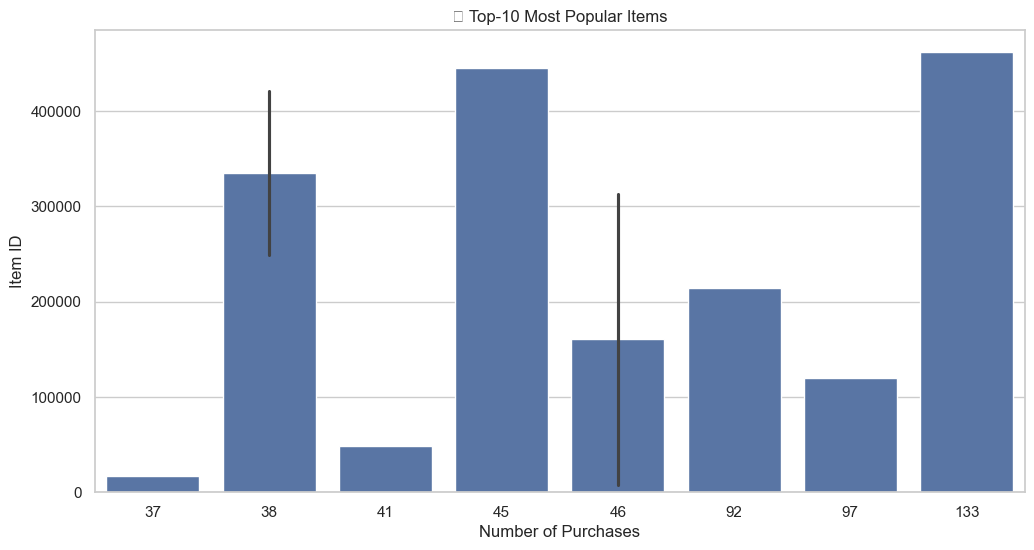

In [13]:
# Уникальные пользователи и товары
print(f"number of unique users: {transactions['user_id'].nunique()}")
print(f"number of unique items: {transactions['item_id'].nunique()}")
print(f"number of transactions: {len(transactions)}")

# Топ-10 популярных товаров
top_items = (
    transactions['item_id']
    .value_counts()
    .head(10)
)

sns.barplot(x=top_items.values, y=top_items.index)
plt.title("🔥 Top-10 Most Popular Items")
plt.xlabel("Number of Purchases")
plt.ylabel("Item ID")
plt.show()


c:\Users\lelik\mine\e-commerce-recommender\recsys_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


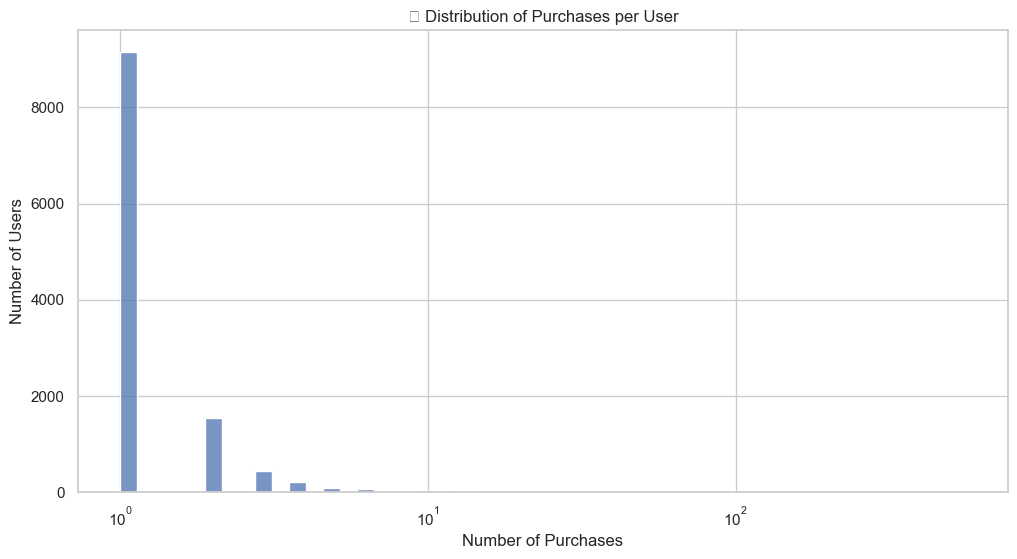

In [9]:
user_activity = transactions.groupby("user_id")['item_id'].count()

sns.histplot(user_activity, bins=50, log_scale=True)
plt.title("📊 Distribution of Purchases per User")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Users")
plt.show()
